<a href="https://colab.research.google.com/github/robajo12/data301_predictive_analytics_machine_learning/blob/main/ml_projects/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Research Questions

+ how likely people's daily time spent on site influence their choice on clicking on Ads?
+ what  is the age of people likely to clique on Ads?


## Environment Set up

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Acquisition

In [ ]:
adv_df= pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/advertising.csv')
adv_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Data Wrangling

In [ ]:
adv_df['Male'].unique()

array([0, 1])

In [ ]:
adv_df['Clicked on Ad'].unique()

array([0, 1])

In [ ]:
adv_df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad'],
      dtype='object')

In [ ]:
adv_df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [ ]:
# dropping unnecessary columns
adv_df.drop(columns=['City', 'Ad Topic Line', 'Country','Timestamp'],inplace=True)
adv_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


## Exploratory Data Analysis

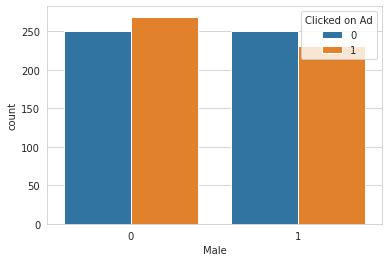

In [ ]:
# Ploting cliqued on ad by gender
sns.set_style('whitegrid')
sns.countplot(x='Male', hue='Clicked on Ad', data=adv_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


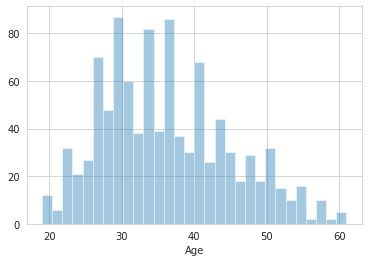

In [ ]:
sns.distplot(adv_df['Age'].dropna(), kde=False, bins=30)

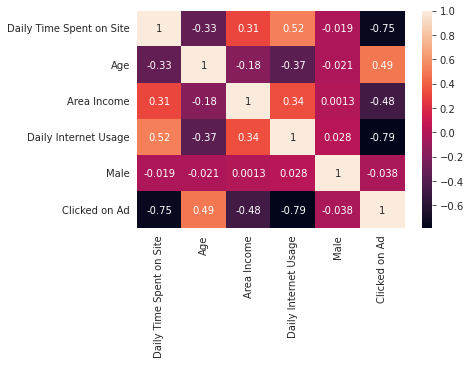

In [ ]:
sns.heatmap(adv_df.corr(),annot=True)

#### Observation#
- There is a strong positive correlation between Daily time spent on site and Daily internet usage and between age and cliqued on Ad.
- There is a negative correlation between Daily internet Usage and cliqued on Ad.

## Building the machine Learning models 

In [ ]:
X = adv_df[['Daily Time Spent on Site','Age', 'Area Income',
       'Daily Internet Usage']]
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,68.95,35,61833.90,256.09
1,80.23,31,68441.85,193.77
2,69.47,26,59785.94,236.50
3,74.15,29,54806.18,245.89
4,68.37,35,73889.99,225.58


In [ ]:
y=adv_df[['Clicked on Ad']]
y.head()

,Clicked on Ad
0,0
1,0
2,0
3,0
4,0


##### -- Logistic Regression

In [ ]:
#Import LogisticRegression from sklearn's linear_model
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [ ]:
# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split
# Split X and y into train and test sets and view the diffrents shape
x_train, x_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(750, 4) (250, 4) (750, 1) (250, 1)


In [ ]:
# Fit the LogisticRegression to the training data
logReg.fit(x_train,y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Use the fitted model to make predictions on the test data
y_pred = logReg.predict(x_test)
y_test.values[0:10]

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0]])

In [ ]:
y_pred[0:10]

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
#print the score of the model
logReg.score(x_test,y_test)

0.888

In [ ]:
#print the accuracy score of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.888

In [ ]:
# Import confusion_matrix from sklearn's metrics module and print the matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[127,  13],
       [ 15,  95]])

Text(33.0, 0.5, 'Actual Values')

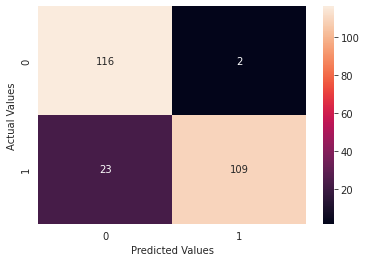

In [ ]:
#ploting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [ ]:
# Print the report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       140
           1       0.88      0.86      0.87       110

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



#### -- KNN model

##### Standardization and Normalization of the data

In [ ]:
# Using StandardScaler library
from sklearn.preprocessing import StandardScaler
# define scaler
scalar = StandardScaler()

In [ ]:
scalar.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
#transform data
scaled_features = scalar.transform(X)
std_data = pd.DataFrame(scaled_features,columns=X.columns)
std_data.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,0.249267,-0.114905,0.509691,1.734030
1,0.961132,-0.570425,1.002530,0.313805
2,0.282083,-1.139826,0.356949,1.287589
3,0.577432,-0.798185,-0.014456,1.501580
4,0.212664,-0.114905,1.408868,1.038731


##### Fitting the model of the data

In [ ]:
#fitting the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,adv_df['Clicked on Ad'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((750, 4), (250, 4), (750,), (250,))

In [ ]:
# Import KNeighborsClassifier frrom sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier
# Create an instance of KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)



In [ ]:
# Fit the KNeighborsClassifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
# Use the fitted model to make predictions on the test data

y_predict = knn.predict(X_test)


In [ ]:
# Actual test values 
y_test.values[0:10]


array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
# prediction on test data
y_predict[0:10]

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [ ]:
#print the score of the model
knn.score(X_test,y_test)

0.808

In [ ]:
# Fit the test labels and predictions into confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_predict)

array([[ 98,  27],
       [ 21, 104]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.808

Text(33.0, 0.5, 'Actual Values')

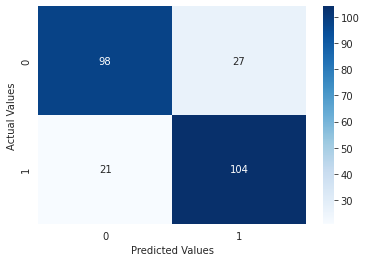

In [ ]:
#ploting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='.0f', cmap = 'Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')



In [ ]:
# Print the report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       125
           1       0.79      0.83      0.81       125

    accuracy                           0.81       250
   macro avg       0.81      0.81      0.81       250
weighted avg       0.81      0.81      0.81       250



-- KNN value and Accuracy

In [ ]:
from sklearn import metrics
score = []

In [ ]:
# Calculate score for K values between 1 and 25
for i in range(1,25):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_predict = knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test,y_predict))



In [ ]:
print(score)

[0.808, 0.752, 0.748, 0.728, 0.732, 0.736, 0.748, 0.736, 0.74, 0.74, 0.744, 0.752, 0.744, 0.752, 0.74, 0.744, 0.74, 0.752, 0.752, 0.752, 0.756, 0.756, 0.76, 0.756]


In [ ]:
# Calculate error rate for K values between 1 and 25
error_rate = []
for i in range(1,50):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i !=y_test))


(Text(0, 0.5, 'Error rate'),)

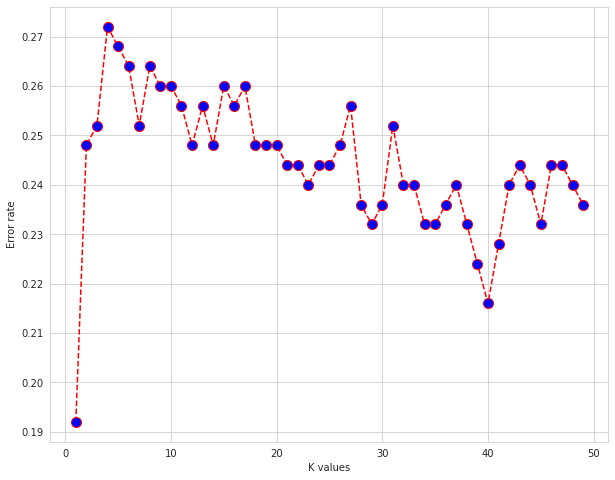

In [ ]:
#plot k value vs mean error to visualize the relationship between error rate and k value
plt.figure(figsize=(10,8))
plt.plot(range(1,50), error_rate, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize =10)
plt.xlabel('K values')
plt.ylabel('Error rate'), 

#### Conclusion
 According to the result from the above: 
 - Logistic regression model has  score on f1-score .90 and .87. It means that the model makes good prediction at 90% that people will not clique on Ads and at 87% that they will. 
 
- KNN model achieves maximum accuracy with a minimum error rate at k = 1.
- KNN model makes 80% of good prediction with K =1.

- Of the two, Logistic regression model is the most efficient approach.  